In [1]:
from sqlalchemy import create_engine
from getpass import getpass
secret = getpass('Enter the secret value: ')

Enter the secret value: ········


In [2]:
pip install psycopg2

In [2]:
import psycopg2
connection = psycopg2.connect(
    host = 'housingdatabase.chkn2wwlsbys.us-east-2.rds.amazonaws.com',
    port = 5432,
    user = 'postgres',
    password = secret,
    database='NYChouses'
    )
cursor=connection.cursor()


In [3]:
import pandas as pd

pd.set_option('display.max_colwidth',1000)

In [4]:
sql = """
SELECT *
FROM fulloutputhousing
"""
fulloutpuhousing = pd.read_sql(sql, con=connection)

In [5]:
#table for EDA
fulloutpuhousing.head()


,address,zipcode,date,beds,bath,sq_ft,house_price,city,county,county_type,boro,income_over_100k,income_under_100k,employed,unemployed
0,"4205 48th Ave APT 3G, Flushing, NY 11377",11377,2020-10-16,Studio,1.0,53400,244000,Woodside,Woodside,Queens,Queens County,166650,1015040,1099996,39401
1,"14404 76th Rd, Flushing, NY 11367",11367,2020-10-16,3,3.0,1980,680000,Flushing,Flushing,Queens,Queens County,166650,1015040,1099996,39401
2,"35 88th St, Brooklyn, NY 11209",11209,2020-10-16,3,1.0,1520,900000,Brooklyn,Brooklyn,Kings,Kings County,188640,1067440,1149461,48699
3,"11128 130th St, Jamaica, NY 11420",11420,2020-10-16,3,2.0,1440,625000,South Ozone Park,South Ozone Park,Queens,Queens County,166650,1015040,1099996,39401
4,"20102 32nd Ave, Flushing, NY 11361",11361,2020-10-16,2,1.0,1406,1720000,Bayside,Bayside,Queens,Queens County,166650,1015040,1099996,39401


In [6]:
#table for M/L model based of test data share with Toral
house2data = fulloutpuhousing[['house_price', 'address', 'zipcode', 'date', 'beds', 'bath','sq_ft', 'boro', 'employed', 'unemployed', 'income_over_100k', 'income_under_100k']]
house2data.columns = ['price','address','zip','date','beds','bath','sq_ft','boro','Employed','Unemployed','income above 100k','income below 100k']
house2data


,price,address,zip,date,beds,bath,sq_ft,boro,Employed,Unemployed,income above 100k,income below 100k
0,244000,"4205 48th Ave APT 3G, Flushing, NY 11377",11377,2020-10-16,Studio,1.0,53400,Queens County,1099996,39401,166650,1015040
1,680000,"14404 76th Rd, Flushing, NY 11367",11367,2020-10-16,3,3.0,1980,Queens County,1099996,39401,166650,1015040
2,900000,"35 88th St, Brooklyn, NY 11209",11209,2020-10-16,3,1.0,1520,Kings County,1149461,48699,188640,1067440
3,625000,"11128 130th St, Jamaica, NY 11420",11420,2020-10-16,3,2.0,1440,Queens County,1099996,39401,166650,1015040
4,1720000,"20102 32nd Ave, Flushing, NY 11361",11361,2020-10-16,2,1.0,1406,Queens County,1099996,39401,166650,1015040
...,...,...,...,...,...,...,...,...,...,...,...,...
72657,317554,"2835 Webb Ave, Bronx, NY 10468",10468,2020-09-11,2,2.0,83000,Bronx County,565642,32035,55180,173430
72658,157000,"2640 Marion Ave APT 6H, Bronx, NY 10458",10458,2020-08-18,2,1.0,91075,Bronx County,565642,32035,55180,173430
72659,11500,"1711 Davidson Ave, Bronx, NY 10453",10453,2020-08-07,0,0.0,98700,Bronx County,565642,32035,55180,173430
72660,180887,"871 Elton Ave APT 2, Bronx, NY 10451",10451,2020-08-24,0,0.0,99240,Bronx County,565642,32035,55180,173430


In [7]:
house2data.groupby('boro').mean()

,price,zip,bath,sq_ft,Employed,Unemployed,income above 100k,income below 100k
boro,,,,,,,,
Bronx County,5.021488e+05,10464.877898,1.732945,3375.714065,565642.0,32035.0,55180.0,173430.0
Kings County,1.415096e+06,11228.788652,1.635106,3836.717730,1149461.0,48699.0,188640.0,1067440.0
New York County,2.200729e+06,10019.301713,1.467185,6219.493390,879665.0,31973.0,300250.0,594060.0
Queens County,7.026108e+05,11389.757455,1.862737,4115.249912,1099996.0,39401.0,166650.0,1015040.0
Richmond County,5.824694e+05,10308.421703,2.323308,1830.938187,213734.0,8585.0,55180.0,173430.0


In [8]:

# Import our dependencies
import sklearn as skl
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf

C:\Users\914bo\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\914bo\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\914bo\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\914bo\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\f

In [9]:
df = house2data

In [10]:

# Read in Housing data
df.head()

,price,address,zip,date,beds,bath,sq_ft,boro,Employed,Unemployed,income above 100k,income below 100k
0,244000,"4205 48th Ave APT 3G, Flushing, NY 11377",11377,2020-10-16,Studio,1.0,53400,Queens County,1099996,39401,166650,1015040
1,680000,"14404 76th Rd, Flushing, NY 11367",11367,2020-10-16,3,3.0,1980,Queens County,1099996,39401,166650,1015040
2,900000,"35 88th St, Brooklyn, NY 11209",11209,2020-10-16,3,1.0,1520,Kings County,1149461,48699,188640,1067440
3,625000,"11128 130th St, Jamaica, NY 11420",11420,2020-10-16,3,2.0,1440,Queens County,1099996,39401,166650,1015040
4,1720000,"20102 32nd Ave, Flushing, NY 11361",11361,2020-10-16,2,1.0,1406,Queens County,1099996,39401,166650,1015040


In [11]:
# Print out the boro value counts
boro_counts = df.boro.value_counts()
boro_counts

Queens County                                         45608
New York County                                       21484
Kings County                                           2820
Richmond County                                        1456
Bronx County                                           1294
Name: boro, dtype: int64

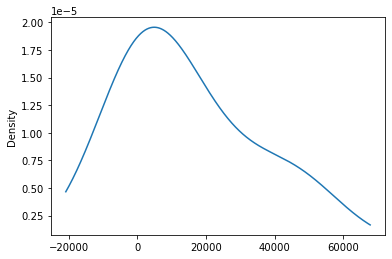

In [12]:

# Visualize the value counts
boro_counts.plot.density()

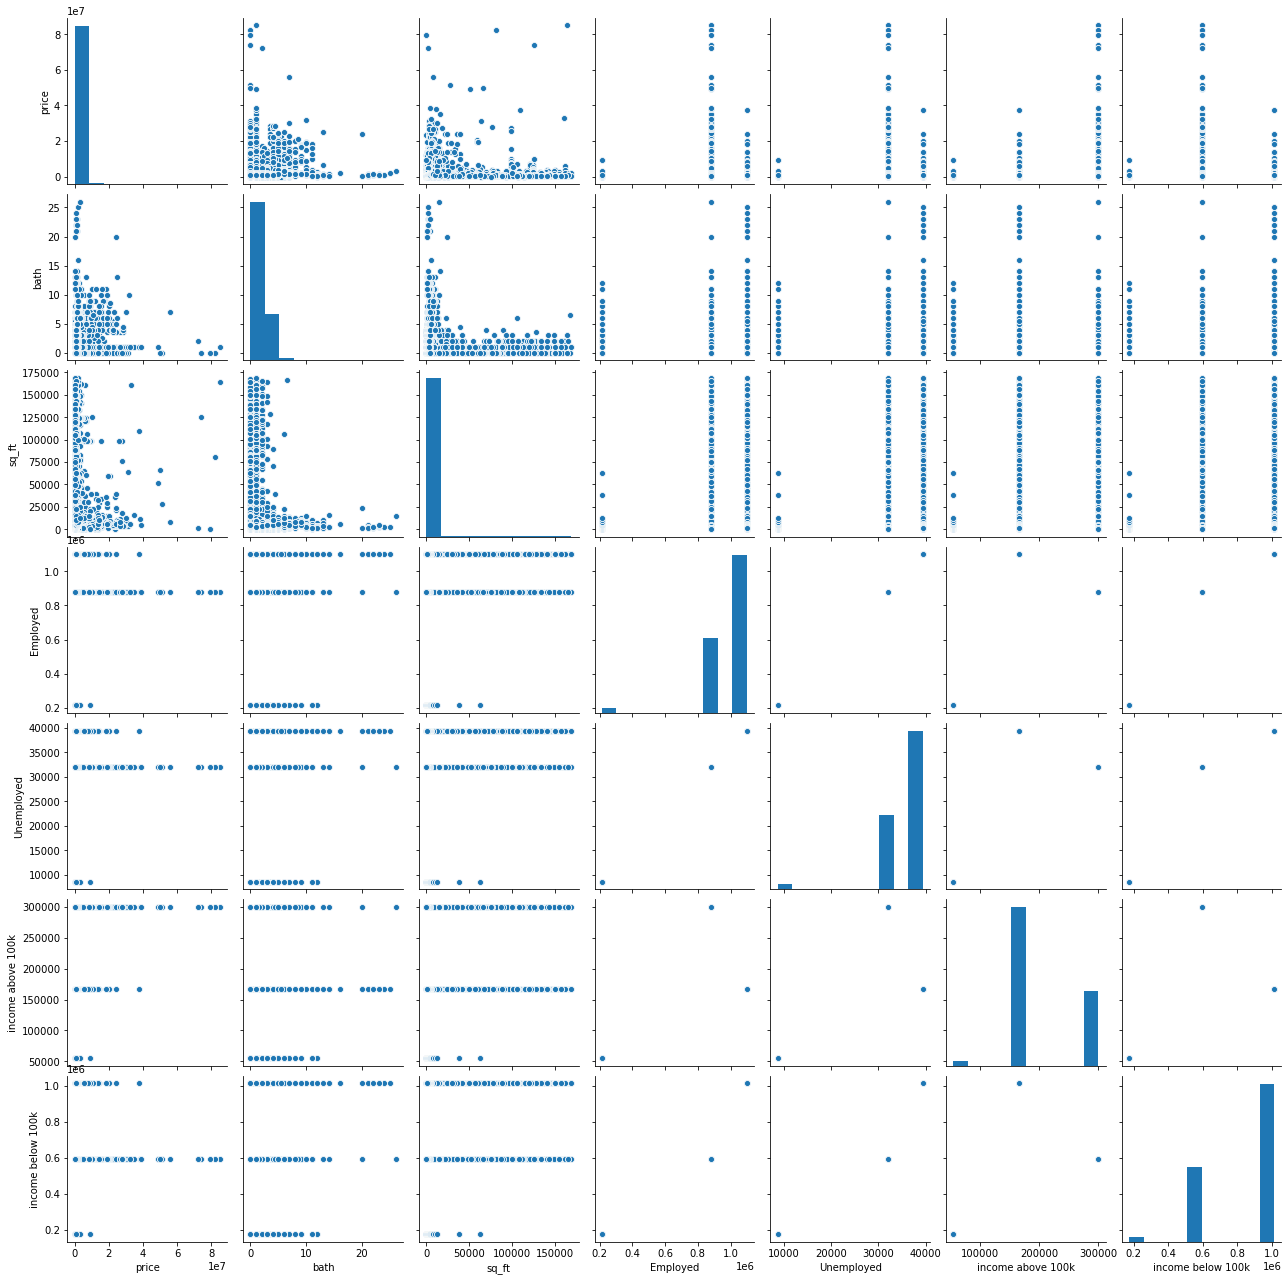

In [13]:
sns.pairplot(df.drop(['zip'], axis=1))

In [13]:
new_df = df.drop(['address', 'date'], axis=1)
new_df.head()


,price,zip,beds,bath,sq_ft,boro,Employed,Unemployed,income above 100k,income below 100k
0,244000,11377,Studio,1.0,53400,Queens County,1099996,39401,166650,1015040
1,680000,11367,3,3.0,1980,Queens County,1099996,39401,166650,1015040
2,900000,11209,3,1.0,1520,Kings County,1149461,48699,188640,1067440
3,625000,11420,3,2.0,1440,Queens County,1099996,39401,166650,1015040
4,1720000,11361,2,1.0,1406,Queens County,1099996,39401,166650,1015040


In [14]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,drop ="first")

In [15]:
del df

In [16]:
# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(new_df.boro.values.reshape(-1,1)))

In [17]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['boro'])
encode_df.head()

,boro_Kings County,boro_New York County,boro_Queens County,boro_Richmond County
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [18]:
# Merge the two DataFrames together and drop the boro column
new2_df=new_df.merge(encode_df,left_index=True,right_index=True).drop("boro",1)
new2_df.head()

,price,zip,beds,bath,sq_ft,Employed,Unemployed,income above 100k,income below 100k,boro_Kings County,boro_New York County,boro_Queens County,boro_Richmond County
0,244000,11377,Studio,1.0,53400,1099996,39401,166650,1015040,0.0,0.0,1.0,0.0
1,680000,11367,3,3.0,1980,1099996,39401,166650,1015040,0.0,0.0,1.0,0.0
2,900000,11209,3,1.0,1520,1149461,48699,188640,1067440,1.0,0.0,0.0,0.0
3,625000,11420,3,2.0,1440,1099996,39401,166650,1015040,0.0,0.0,1.0,0.0
4,1720000,11361,2,1.0,1406,1099996,39401,166650,1015040,0.0,0.0,1.0,0.0


In [19]:
del new_df

In [20]:

#Find null Values

for column in new2_df.columns:
    print(f"Column {column} has {new2_df[column].isnull().sum()} null values")

Column price has 0 null values
Column zip has 0 null values
Column beds has 0 null values
Column bath has 218 null values
Column sq_ft has 0 null values
Column Employed has 0 null values
Column Unemployed has 0 null values
Column income above 100k has 0 null values
Column income below 100k has 0 null values
Column boro_Kings County                                       has 0 null values
Column boro_New York County                                    has 0 null values
Column boro_Queens County                                      has 0 null values
Column boro_Richmond County                                    has 0 null values


In [21]:
# Drop null rows
new2_df = new2_df.dropna()


In [22]:
#Find null Values

for column in new2_df.columns:
    print(f"Column {column} has {new2_df[column].isnull().sum()} null values")

Column price has 0 null values
Column zip has 0 null values
Column beds has 0 null values
Column bath has 0 null values
Column sq_ft has 0 null values
Column Employed has 0 null values
Column Unemployed has 0 null values
Column income above 100k has 0 null values
Column income below 100k has 0 null values
Column boro_Kings County                                       has 0 null values
Column boro_New York County                                    has 0 null values
Column boro_Queens County                                      has 0 null values
Column boro_Richmond County                                    has 0 null values


In [23]:
# List dataframe data types
new2_df.dtypes

price                                                        int64
zip                                                          int64
beds                                                        object
bath                                                       float64
sq_ft                                                        int64
Employed                                                     int64
Unemployed                                                   int64
income above 100k                                            int64
income below 100k                                            int64
boro_Kings County                                          float64
boro_New York County                                       float64
boro_Queens County                                         float64
boro_Richmond County                                       float64
dtype: object

In [24]:
new2_df['zip']=new2_df['zip'].astype('str')
new2_df.head()

,price,zip,beds,bath,sq_ft,Employed,Unemployed,income above 100k,income below 100k,boro_Kings County,boro_New York County,boro_Queens County,boro_Richmond County
0,244000,11377,Studio,1.0,53400,1099996,39401,166650,1015040,0.0,0.0,1.0,0.0
1,680000,11367,3,3.0,1980,1099996,39401,166650,1015040,0.0,0.0,1.0,0.0
2,900000,11209,3,1.0,1520,1149461,48699,188640,1067440,1.0,0.0,0.0,0.0
3,625000,11420,3,2.0,1440,1099996,39401,166650,1015040,0.0,0.0,1.0,0.0
4,1720000,11361,2,1.0,1406,1099996,39401,166650,1015040,0.0,0.0,1.0,0.0


In [25]:
# Print out the boro value counts
zip_counts = new2_df.zip.value_counts()
zip_counts

11413    1440
11420    1438
11379    1438
11365    1430
11412    1418
         ... 
11228       4
11101       4
11220       2
11243       2
11223       2
Name: zip, Length: 159, dtype: int64

In [26]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,drop ="first")

In [27]:
# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(new2_df.zip.values.reshape(-1,1)))

In [28]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['zip'])
encode_df.head()

,zip_10002,zip_10003,zip_10004,zip_10005,zip_10006,zip_10007,zip_10009,zip_10010,zip_10011,zip_10012,...,zip_11426,zip_11427,zip_11428,zip_11429,zip_11430,zip_11432,zip_11433,zip_11434,zip_11435,zip_11436
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Merge the two DataFrames together and drop the boro column
new3_df=new2_df.merge(encode_df,left_index=True,right_index=True).drop("zip",1)
new3_df.head()

,price,beds,bath,sq_ft,Employed,Unemployed,income above 100k,income below 100k,boro_Kings County,boro_New York County,...,zip_11426,zip_11427,zip_11428,zip_11429,zip_11430,zip_11432,zip_11433,zip_11434,zip_11435,zip_11436
0,244000,Studio,1.0,53400,1099996,39401,166650,1015040,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,680000,3,3.0,1980,1099996,39401,166650,1015040,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,900000,3,1.0,1520,1149461,48699,188640,1067440,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,625000,3,2.0,1440,1099996,39401,166650,1015040,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1720000,2,1.0,1406,1099996,39401,166650,1015040,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
del new2_df

In [31]:
new3_df.dtypes

price          int64
beds          object
bath         float64
sq_ft          int64
Employed       int64
              ...   
zip_11432    float64
zip_11433    float64
zip_11434    float64
zip_11435    float64
zip_11436    float64
Length: 170, dtype: object

In [32]:
# Print out the bath value counts
bath_counts = new3_df.bath.value_counts()
bath_counts

1.00     23310
2.00     18484
0.00     11973
3.00     10954
4.00      3267
5.00      1550
1.50       892
2.50       569
6.00       488
7.00       163
3.50       159
11.00       90
12.00       80
4.50        62
8.00        55
9.00        31
10.00       28
13.00       16
1.75        14
5.50        10
21.00        8
22.00        6
23.00        6
14.00        6
8.50         4
6.50         4
20.00        4
2.75         2
0.50         2
1.10         2
25.00        2
24.00        2
16.00        2
1.25         2
26.00        2
Name: bath, dtype: int64

In [33]:
# Print out the bath value counts
price_counts = new3_df.price.value_counts()

price_counts

10        916
750000    652
800000    636
650000    615
550000    592
         ... 
317554      1
11500       1
943400      1
834502      1
725237      1
Name: price, Length: 3744, dtype: int64

In [34]:
delete_row = new3_df[new3_df["price"]<11].index
new3_df = new3_df.drop(delete_row)
new3_df.head()

,price,beds,bath,sq_ft,Employed,Unemployed,income above 100k,income below 100k,boro_Kings County,boro_New York County,...,zip_11426,zip_11427,zip_11428,zip_11429,zip_11430,zip_11432,zip_11433,zip_11434,zip_11435,zip_11436
0,244000,Studio,1.0,53400,1099996,39401,166650,1015040,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,680000,3,3.0,1980,1099996,39401,166650,1015040,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,900000,3,1.0,1520,1149461,48699,188640,1067440,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,625000,3,2.0,1440,1099996,39401,166650,1015040,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1720000,2,1.0,1406,1099996,39401,166650,1015040,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,drop ="first")

In [36]:
# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(new3_df.bath.values.reshape(-1,1)))

In [37]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['bath'])
encode_df.head()

,bath_0.5,bath_1.0,bath_1.1,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.5,bath_2.75,bath_3.0,...,bath_13.0,bath_14.0,bath_16.0,bath_20.0,bath_21.0,bath_22.0,bath_23.0,bath_24.0,bath_25.0,bath_26.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Merge the two DataFrames together and drop the boro column
new4_df=new3_df.merge(encode_df,left_index=True,right_index=True).drop("bath",1)
new4_df.head()

,price,beds,sq_ft,Employed,Unemployed,income above 100k,income below 100k,boro_Kings County,boro_New York County,boro_Queens County,...,bath_13.0,bath_14.0,bath_16.0,bath_20.0,bath_21.0,bath_22.0,bath_23.0,bath_24.0,bath_25.0,bath_26.0
0,244000,Studio,53400,1099996,39401,166650,1015040,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,680000,3,1980,1099996,39401,166650,1015040,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,900000,3,1520,1149461,48699,188640,1067440,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,625000,3,1440,1099996,39401,166650,1015040,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1720000,2,1406,1099996,39401,166650,1015040,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
new4_df.columns

Index(['price', 'beds', 'sq_ft', 'Employed', 'Unemployed', 'income above 100k',
       'income below 100k',
       'boro_Kings County                                      ',
       'boro_New York County                                   ',
       'boro_Queens County                                     ',
       ...
       'bath_13.0', 'bath_14.0', 'bath_16.0', 'bath_20.0', 'bath_21.0',
       'bath_22.0', 'bath_23.0', 'bath_24.0', 'bath_25.0', 'bath_26.0'],
      dtype='object', length=203)

In [40]:
del new3_df

In [41]:
# Print out the bath value counts
beds_counts = new4_df.beds.value_counts()
beds_counts

3         15360
2         11116
0         10828
1          9988
4          7238
Studio     6914
5          3652
6          2805
7           991
8           618
9           250
10           84
11           44
12           36
13            7
14            6
16            4
21            2
50            2
31            2
42            2
15            2
Name: beds, dtype: int64

In [42]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,drop ="first")

In [43]:
# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(new4_df.beds.values.reshape(-1,1)))

In [44]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['beds'])
encode_df.head()

,beds_1,beds_10,beds_11,beds_12,beds_13,beds_14,beds_15,beds_16,beds_2,beds_21,...,beds_31,beds_4,beds_42,beds_5,beds_50,beds_6,beds_7,beds_8,beds_9,beds_Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Merge the two DataFrames together and drop the beds column
new5_df=new4_df.merge(encode_df,left_index=True,right_index=True).drop("beds",1)
new5_df.head()

,price,sq_ft,Employed,Unemployed,income above 100k,income below 100k,boro_Kings County,boro_New York County,boro_Queens County,boro_Richmond County,...,beds_31,beds_4,beds_42,beds_5,beds_50,beds_6,beds_7,beds_8,beds_9,beds_Studio
0,244000,53400,1099996,39401,166650,1015040,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,680000,1980,1099996,39401,166650,1015040,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,900000,1520,1149461,48699,188640,1067440,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,625000,1440,1099996,39401,166650,1015040,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1720000,1406,1099996,39401,166650,1015040,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
new5_df.columns

Index(['price', 'sq_ft', 'Employed', 'Unemployed', 'income above 100k',
       'income below 100k',
       'boro_Kings County                                      ',
       'boro_New York County                                   ',
       'boro_Queens County                                     ',
       'boro_Richmond County                                   ',
       ...
       'beds_31', 'beds_4', 'beds_42', 'beds_5', 'beds_50', 'beds_6', 'beds_7',
       'beds_8', 'beds_9', 'beds_Studio'],
      dtype='object', length=223)

In [47]:
# List dataframe data types
new5_df.dtypes

price                  int64
sq_ft                  int64
Employed               int64
Unemployed             int64
income above 100k      int64
                      ...   
beds_6               float64
beds_7               float64
beds_8               float64
beds_9               float64
beds_Studio          float64
Length: 223, dtype: object

In [48]:
del new4_df

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [51]:
# Fit the StandardScaler
scaler.fit(new5_df)

StandardScaler()

In [52]:
# Scale the data
scaled_data = scaler.transform(new5_df)

In [53]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns= new5_df.columns)
transformed_scaled_data.head()

,price,sq_ft,Employed,Unemployed,income above 100k,income below 100k,boro_Kings County,boro_New York County,boro_Queens County,boro_Richmond County,...,beds_31,beds_4,beds_42,beds_5,beds_50,beds_6,beds_7,beds_8,beds_9,beds_Studio
0,-0.426298,2.699367,0.570055,0.451427,-0.613973,0.651571,-0.203744,-0.660522,0.753398,-0.098814,...,-0.005393,-0.339836,-0.005393,-0.234651,-0.005393,-0.204632,-0.119798,-0.094366,-0.059916,3.018345
1,-0.232387,-0.155976,0.570055,0.451427,-0.613973,0.651571,-0.203744,-0.660522,0.753398,-0.098814,...,-0.005393,-0.339836,-0.005393,-0.234651,-0.005393,-0.204632,-0.119798,-0.094366,-0.059916,-0.331307
2,-0.134542,-0.181520,0.930514,2.318137,-0.271306,0.893148,4.908131,-0.660522,-1.327319,-0.098814,...,-0.005393,-0.339836,-0.005393,-0.234651,-0.005393,-0.204632,-0.119798,-0.094366,-0.059916,-0.331307
3,-0.256848,-0.185962,0.570055,0.451427,-0.613973,0.651571,-0.203744,-0.660522,0.753398,-0.098814,...,-0.005393,-0.339836,-0.005393,-0.234651,-0.005393,-0.204632,-0.119798,-0.094366,-0.059916,-0.331307
4,0.230153,-0.187850,0.570055,0.451427,-0.613973,0.651571,-0.203744,-0.660522,0.753398,-0.098814,...,-0.005393,-0.339836,-0.005393,-0.234651,-0.005393,-0.204632,-0.119798,-0.094366,-0.059916,-0.331307


In [54]:
# Split our preprocessed data into our features and target arrays
y = new5_df["price"].values
X = new5_df.drop(["price"],1).values

In [55]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [56]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)


# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



### **Train and Evaluate Random Forest Classifier**

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 

In [58]:
# Create a random forest classifier.
rf_model = RandomForestRegressor(n_estimators=128, random_state=78)

In [59]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [60]:
# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Housing price predictive mean squared error: {mean_squared_error(y_test,y_pred):.3f}")

 Housing price predictive mean squared error: 3732010880151.187


In [61]:
y_test

array([2120000,  860000,  775000, ...,  567000,  527500,  560000],
      dtype=int64)

### **Train and Evaluate Deep Learning Model**

In [62]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
51578/51578 [==============================] - 8s 163us/sample - loss: -7277035097.3670 - acc: 0.0000e+00
Epoch 2/50
51578/51578 [==============================] - 7s 139us/sample - loss: -87934102094.1232 - acc: 0.0000e+00
Epoch 3/50
51578/51578 [==============================] - 7s 141us/sample - loss: -303925173782.4939 - acc: 0.0000e+00
Epoch 4/50
51578/51578 [==============================] - 8s 148us/sample - loss: -686964153260.9729 - acc: 0.0000e+00
Epoch 5/50
51578/51578 [==============================] - 7s 142us/sample - loss: -1254117885369.6592 - acc: 0.0000e+00
Epoch 6/50
51578/51578 [==============================] - 7s 137us/sample - loss: -2026537848620.2830 - acc: 0.0000e+00
Epoch 7/50
51578/51578 [==============================] - 7s 138us/sample -

KeyboardInterrupt: 

# Logistic Regression Model

In [63]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)
plt.show()

In [ ]:
pickle.dump(rf_model, open('model.pkl','wb'))
rf_model = pickle.load(open('model.pkl','rb'))